# Naive Bayes

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the preprocessed dataset
dataset = pd.read_csv('preprocessed_mental_health.csv')

# Check if 'cleaned_text' and 'mental_health_issue' columns exist
if 'cleaned_text' not in dataset.columns or 'mental_health_issue' not in dataset.columns:
    raise ValueError("The dataset must have 'cleaned_text' and 'mental_health_issue' columns.")

# Remove rows with missing values in 'cleaned_text' column
dataset.dropna(subset=['cleaned_text'], inplace=True)

# Initialize the CountVectorizer and fit/transform the cleaned text
NBvectorizer = CountVectorizer()
X = NBvectorizer.fit_transform(dataset['cleaned_text'])

# Prepare the target variable
y = dataset['mental_health_issue']

# Split the dataset into Training and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
NBmodel = MultinomialNB()

# Fit the model
NBmodel.fit(X_train, y_train)

# Make predictions
y_pred = NBmodel.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform stratified cross-validation and compute accuracies
cross_val_accuracies = []
for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X[train_index], X[test_index]

    # Use .iloc to access data by position instead of label-based indexing
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    NBmodel.fit(X_train_fold, y_train_fold)
    fold_accuracy = NBmodel.score(X_test_fold, y_test_fold)
    cross_val_accuracies.append(fold_accuracy)

# Convert to NumPy array for consistency
cross_val_accuracies = np.array(cross_val_accuracies)

# Calculate mean and standard deviation
mean_val_accuracy = np.mean(cross_val_accuracies)
std_val_accuracy = np.std(cross_val_accuracies)

# Print cross-validation results
print(f"Cross-Validation Accuracies: {cross_val_accuracies}")
print(f"Mean Validation Accuracy: {mean_val_accuracy * 100:.2f}%")
print(f"Validation Accuracy Std Dev: {std_val_accuracy * 100:.2f}%")

Accuracy: 83.63%
Classification Report:
               precision    recall  f1-score   support

     anxiety       0.70      0.73      0.72       379
     bipolar       0.83      0.45      0.58       384
  depression       0.59      0.87      0.70       373
      normal       0.96      0.92      0.94      2183
        ptsd       0.71      0.83      0.76       394

    accuracy                           0.84      3713
   macro avg       0.76      0.76      0.74      3713
weighted avg       0.85      0.84      0.84      3713

Confusion Matrix:
 [[ 278    4   63    3   31]
 [  30  171   62   86   35]
 [  26    6  323    0   18]
 [  38   21   68 2006   50]
 [  24    5   34    4  327]]
Cross-Validation Accuracies: [0.82359278 0.82467008 0.83463507 0.83705898 0.82520873]
Mean Validation Accuracy: 82.90%
Validation Accuracy Std Dev: 0.56%


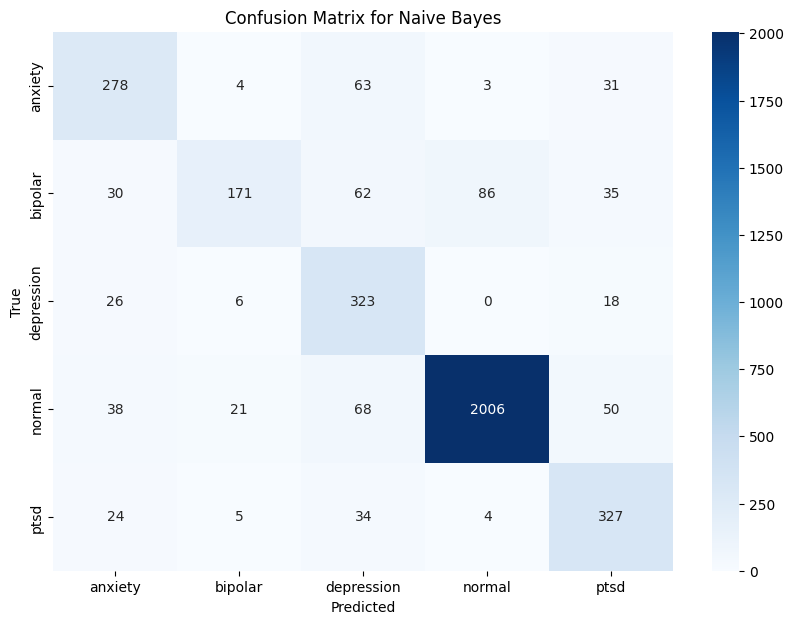

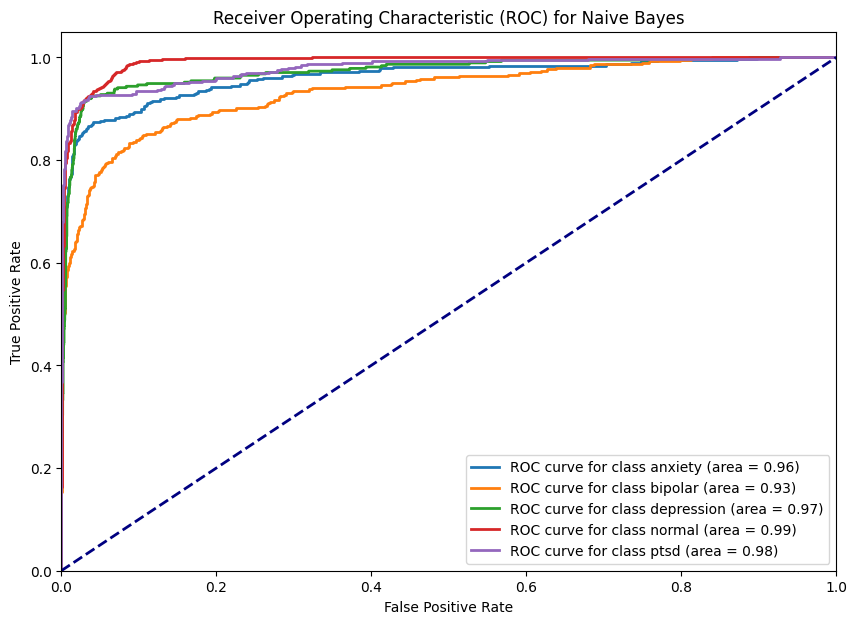

In [ ]:
# Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=NBmodel.classes_)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=NBmodel.classes_, yticklabels=NBmodel.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

# ROC Curve

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the output for ROC
y_test_binarized = label_binarize(y_test, classes=NBmodel.classes_)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate ROC curve for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], NBmodel.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 7))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label='ROC curve for class {0} (area = {1:0.2f})'.format(NBmodel.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Naive Bayes')
plt.legend(loc="lower right")
plt.show()

## CHANGE COLORS

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator CountVectorizer from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/base.py:380: InconsistentVersionWarning: Trying to unpickle estimator MultinomialNB from version 1.5.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


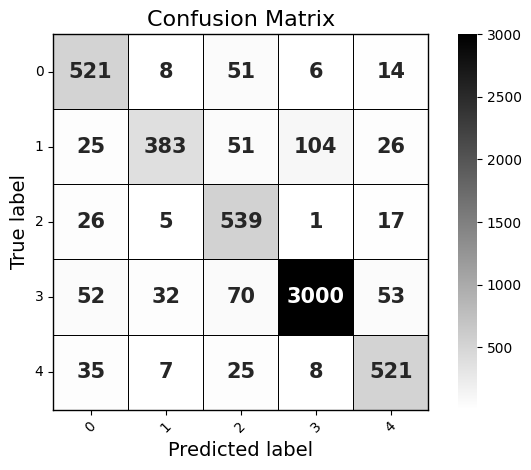

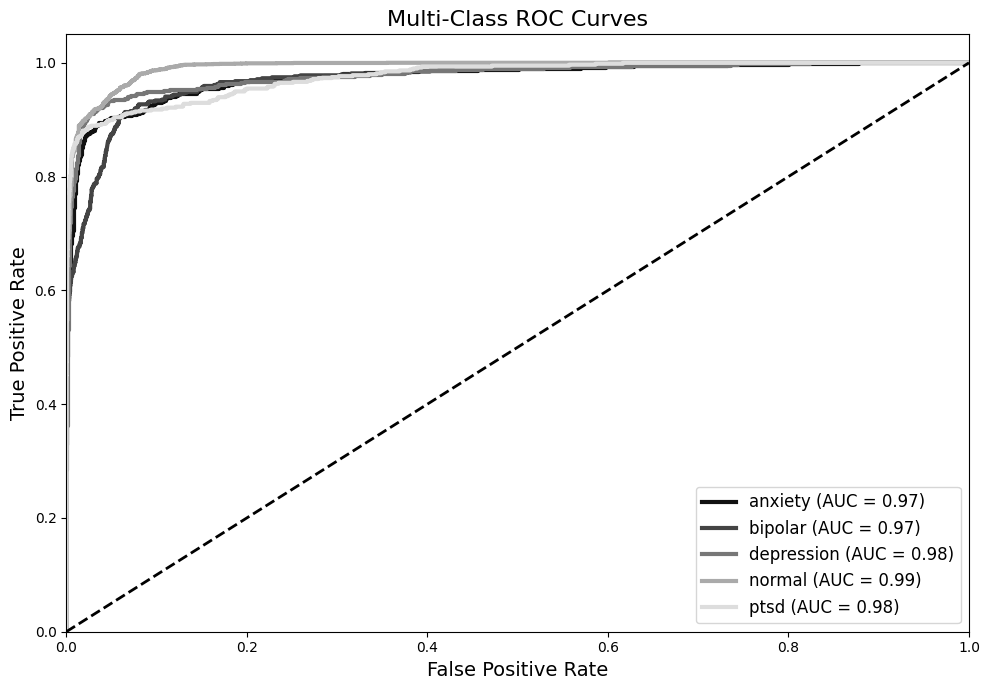

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

# 1. Load your data
df = pd.read_csv('preprocessed_mental_health.csv')

# assume your CSV has 'text' and 'mental_health_issue' columns
X = df['text']
y = df['mental_health_issue']

# 2. Split off 30% for testing (same as you originally did)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# 3. Load your fitted vectorizer and model
with open('NBvectorizer.pkl', 'rb') as f:
    vectorizer = pickle.load(f)

with open('NBmodel.pkl', 'rb') as f:
    model = pickle.load(f)

# 4. Transform your test texts
X_test_vec = vectorizer.transform(X_test)

# 5. Predict
y_pred = model.predict(X_test_vec)
y_proba = model.predict_proba(X_test_vec)

# ----- CONFUSION MATRIX -----
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='gist_yarg',         # grayscale colormap with deep tones ( gist_yarg )
    cbar=True,                # color bar for value reference
    cbar_kws={'label': ''},
    annot_kws={'size':15, 'weight':'bold'},
    linewidths=0.5,           # thinner borders
    linecolor='black',
    square=True
)

# Fix bottom and right border visibility
ax.set_frame_on(True)
for spine in ax.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)


plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# ----- ROC CURVES (multi-class) -----
# 1) binarize the true labels
y_test_bin = label_binarize(y_test, classes=model.classes_)
n_classes = y_test_bin.shape[1]

# 2) compute fpr, tpr, roc_auc per class
fpr = {}
tpr = {}
roc_auc = {}
for i, lbl in enumerate(model.classes_):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# 3) plot
plt.figure(figsize=(10, 7))

# choose a few distinct grey-scale shades
greys = ['#111111', '#444444', '#777777', '#AAAAAA', '#DDDDDD']
# if you have more than 5 classes, you can interpolate or repeat shades

for i, shade in zip(range(n_classes), greys):
    plt.plot(
        fpr[i],
        tpr[i],
        color=shade,
        lw=3,            # extra-thick
        label=f"{model.classes_[i]} (AUC = {roc_auc[i]:0.2f})"
    )

# diagonal chance line
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Multi-Class ROC Curves', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()
